In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# 2. Cek missing values
print("Cek Missing Values:")
print(iris.isnull().sum())  # Menampilkan jumlah missing value per kolom

Cek Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(iris.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
# 3. Split data: fitur dan label
# Memisahkan fitur dan label
X = iris.drop(['Id', 'Species'], axis=1)  # Fitur: tanpa kolom 'Id' dan 'Species'
y = iris['Species']                       # Label: 'Species'


# 4. Split menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk data
print("\nUkuran data latih dan uji:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Ukuran data latih dan uji:
X_train: (120, 4)
X_test : (30, 4)
y_train: (120,)
y_test : (30,)


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

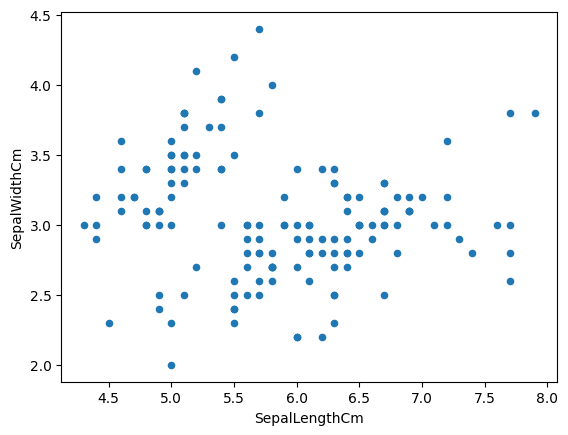

In [ ]:
iris.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

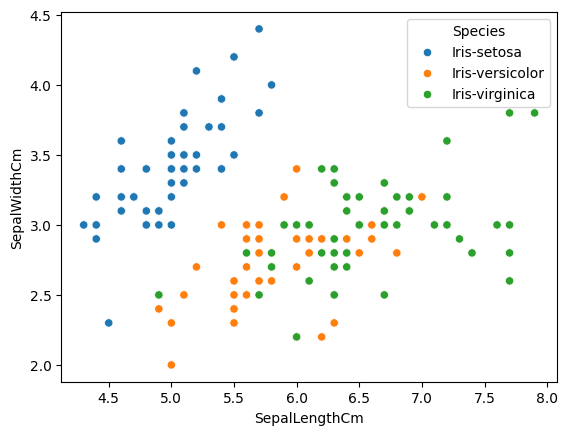

In [ ]:
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

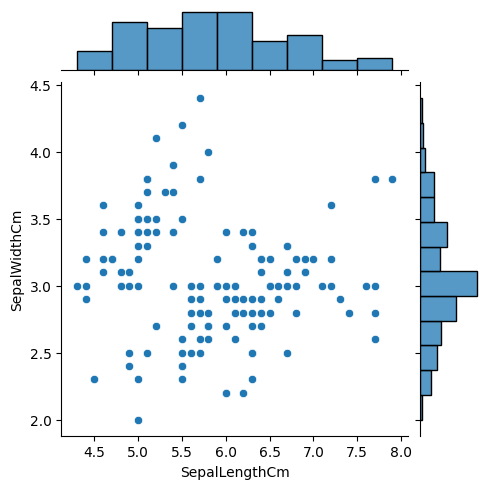

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5)

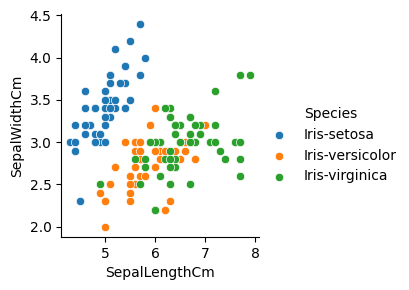

In [ ]:
sns.FacetGrid(iris, hue="Species") .map(sns.scatterplot, "SepalLengthCm", "SepalWidthCm").add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

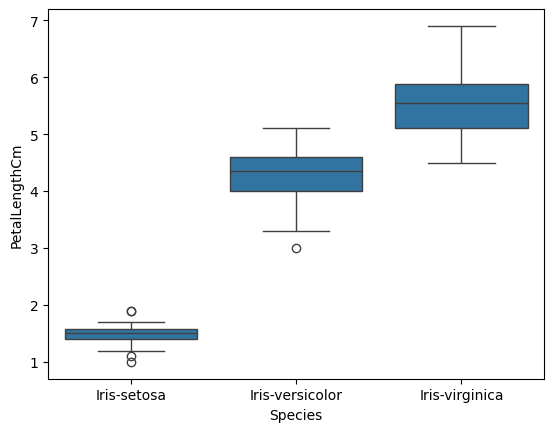

In [ ]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)

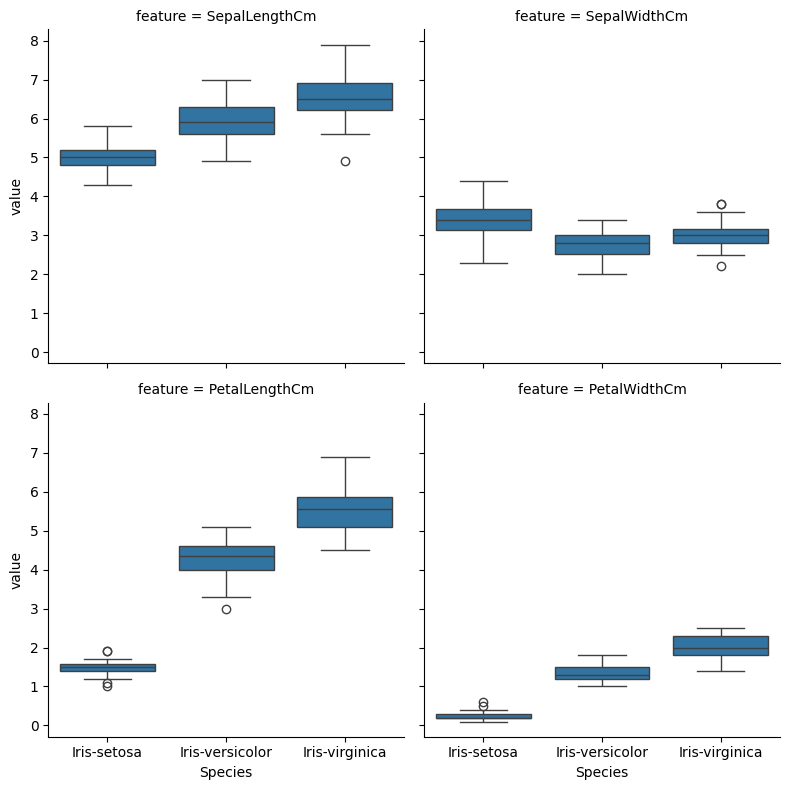

In [ ]:
# FacetGrid kullanabilmek için uzun (long) formata çevireceğiz.
iris_long = iris.melt(id_vars="Species",
                      value_vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                      var_name="feature",
                      value_name="value")

# FacetGrid ile çizim
g = sns.FacetGrid(iris_long, col="feature", col_wrap=2, height=4)
g.map(sns.boxplot, "Species", "value", order=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

MODEL FCNN

Fitur:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label:  ['setosa' 'versicolor' 'virginica']


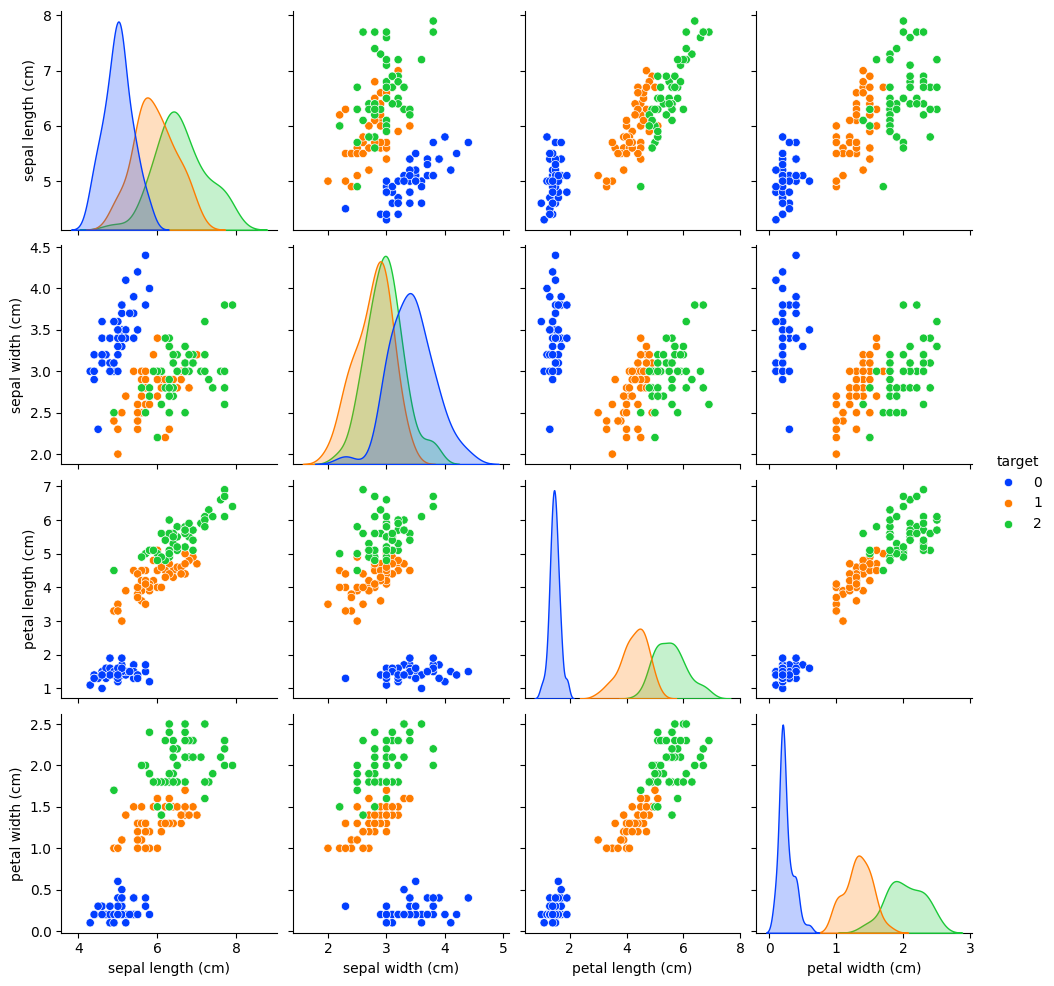

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.3179 - loss: 1.2641 - val_accuracy: 0.3000 - val_loss: 1.2335
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3492 - loss: 1.2270 - val_accuracy: 0.3000 - val_loss: 1.2165
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3490 - loss: 1.1875 - val_accuracy: 0.3000 - val_loss: 1.2006
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3542 - loss: 1.1955 - val_accuracy: 0.3000 - val_loss: 1.1855
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3000 - loss: 1.1834 - val_accuracy: 0.3000 - val_loss: 1.1718
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2969 - loss: 1.1733 - val_accuracy: 0.3000 - val_loss: 1.1591
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3460 - loss: 1.1500 - val_accuracy: 0.3000 - val_loss: 1.1486
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3429 - loss: 1.1434 - val_accuracy: 0.3000 - val_loss: 1.1381


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


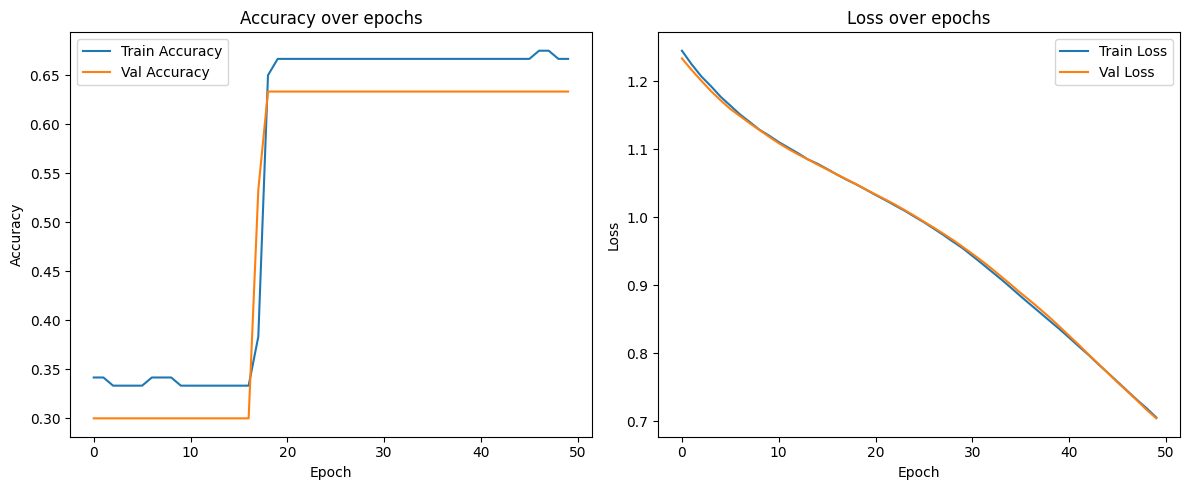

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Tampilkan informasi dataset
print("Fitur: ", iris.feature_names)
print("Label: ", iris.target_names)

# Visualisasi awal
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

sns.pairplot(df, hue='target', palette='bright')
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model MLP
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Ringkasan model
model.summary()

# Training model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Hitung F1-Score dan tampilkan classification report
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nF1-Score: {f1:.4f}\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot Loss dan Akurasi
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
